In [1]:
pip install -r -q requirements_stats.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
ERROR: Could not open requirements file: [Errno 2] No such file or directory: '-q'
Note: you may need to restart the kernel to use updated packages.


## Sound Level Metrics Distributions

Here we will explore the distribution of ocean sound levels from a hydrophone recording. We will access data from the [Sanctuary Soundscape Monitoring Project](https://sanctsound.ioos.us/) which is publicly available through the [NOAA NCEI Passive Acoustics Archive](https://www.ncei.noaa.gov/products/passive-acoustic-data). We will use a dataset of computed broadband sound levels at 1 hour intervals.  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sound_levels = pd.read_csv("https://storage.googleapis.com/noaa-passive-bioacoustic/sanctsound/products/sound_level_metrics/oc03/sanctsound_oc03_02_bb_1h/data/SanctSound_OC03_02_BB_1h.csv")

In [4]:
# summary statistics of the dataset
sound_levels.describe()

,BB_20-24000
count,3003.000000
mean,103.586356
std,7.508545
min,85.349354
25%,98.694873
50%,103.723633
75%,108.123486
max,134.773183


### Histogram

Looking at the histogram of the data provides a good first glance of the distribution of the observations. 

array([[<Axes: title={'center': ' BB_20-24000 '}>]], dtype=object)

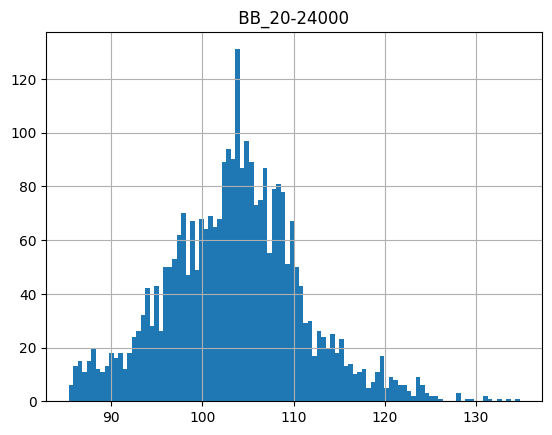

In [5]:
sound_levels.hist(bins=100)

* We observe that the range of the values is approximately (85 dB, 135 dB). Note, since those are averaged over 1 hour windows, the actual observed values can fall outside this range.

* We also observe that the distribution looks skewed which is typical for sound level distributions. The upper tail is long, which corresponds to rare observations of loud sounds.

### Computing Empirical Probability

**The empirical probability** of an event is the relative frequency of the event, or the proportion of trials for which the event occurred.

**Example:** compute the probability for the event **sound levels > 120 dB**.

In [6]:
# note the BB_20-24000 column name has spaces around it!
# let's calculate the proportion of the values

sum(sound_levels[" BB_20-24000 "]>120)/len(sound_levels)

0.024642024642024644

The histogram splits the range of the outcomes into small intervals (bins) and computes the frequency of the observed outcomes in each bin. Thus, if we compute the normalized histogram (each frequency is divided by the total number of observations), we can use it to estimate the empirical probability that the sound level falls within a particular interval (by summing the frequency for the bins falling in this interval).

Text(0.5, 1.0, 'Sound Level Normalized Histogram')

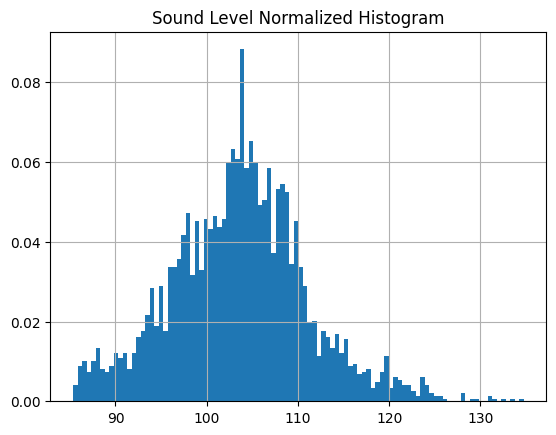

In [7]:
# Set density=True to plot normalized histogram
h = sound_levels[' BB_20-24000 '].hist(bins=100, density=True)
plt.title("Sound Level Normalized Histogram")

**Example:**  For example, if we are interested in the event ** 100 < sound level < 110**. We can build the histogram and the area under heights of the histogram bars and between those bounds will roughly correspond to the empirical probability of this event.

In [8]:
bound_lower = 100
bound_upper = 110

Text(0.5, 1.0, 'Probability: 0.53')

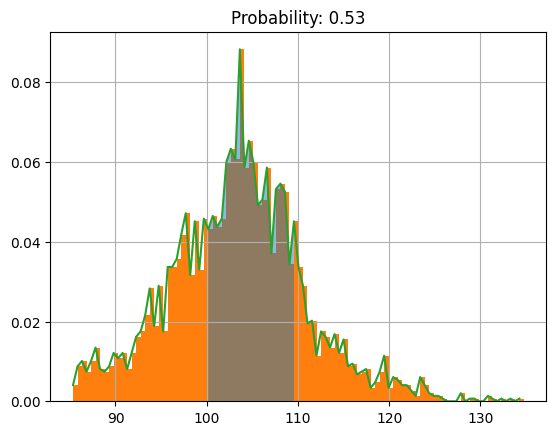

In [9]:
# calculate normalized histogram and store values
h = sound_levels[' BB_20-24000 '].hist(bins=100, density=True)
plt.title("Sound Level Normalized Histogram")
h = plt.hist(sound_levels[' BB_20-24000 '].values, bins=100, density=True)
plt.plot(h[1][:-1], h[0],)
plt.fill_between(h[1][:-1], h[0], where=((h[1][:-1]>bound_lower) & (h[1][:-1]<bound_upper)), alpha=0.5)
p = sum(h[0][(h[1][:-1]>bound_lower) & (h[1][:-1]<bound_upper)])/sum(h[0])
plt.title("Probability: {:.2f}".format(p))

### Empirical Probability Widget

We will make a widget to explore the empirical probability for arbitrary intervals.

In [10]:
from ipywidgets import interact
import ipywidgets as widgets

In [11]:
bound_slider = widgets.FloatRangeSlider(
    value=[min(sound_levels[' BB_20-24000 ']), max(sound_levels[' BB_20-24000 '])],
    min=min(sound_levels[' BB_20-24000 ']),
    max=max(sound_levels[' BB_20-24000 ']),
    step=0.1,
    description='dB Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',

)

In [12]:
def plot_probability(bounds):
  plt.title("Sound Level Normalized Histogram")
  h = plt.hist(sound_levels[' BB_20-24000 '].values, bins=100, density=True)
  plt.plot(h[1][:-1], h[0])
  plt.fill_between(h[1][:-1], h[0], where=((h[1][:-1]>bounds[0]) & (h[1][:-1]<bounds[1])), alpha=0.3, color='g')
  p = sum(h[0][(h[1][:-1]>bounds[0]) & (h[1][:-1]<bounds[1])])/sum(h[0])
  plt.title("Probability: {:.2f}".format(p))
  plt.show()


In [13]:
out = interact(plot_probability, bounds=bound_slider)

interactive(children=(FloatRangeSlider(value=(85.349354, 134.773183), continuous_update=False, description='dB…